In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# User function
import MongoDB as mdb
import DataPreprocessing as dp
import LearningCurve as lc
import Hadoop as hd

In [2]:
# Download the dataset
hd.getData()

X,y = dp.DataPreprocessing("dataset.csv",True)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

d:\software\python3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=0.0001)
model.fit(X_train,y_train)
predicted_lr = model.predict(X_test)
print("Test set accuracy score:{:.5f}".format(accuracy_score(predicted_lr,y_test,)))

Test set accuracy score:0.69737


In [4]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
random_forest.fit(X_train,y_train)
predicted = random_forest.predict(X_test)
print("Test set accuracy score:{:.5f}".format(accuracy_score(predicted,y_test,)))

Test set accuracy score:0.96301


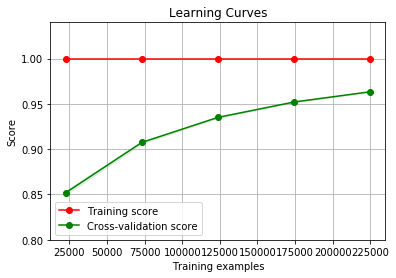

In [ ]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 10, test_size=0.3, random_state=42)
lc.plot_learning_curve(random_forest, "Learning Curves", X, y, ylim=(0.8, 1.04), cv=cv, n_jobs=-1)
plt.show()

In [ ]:
print("Training complete, now input your data for predicting!(Ex: `dataset.csv`)")
predData = input()
X = dp.DataPreprocessing(predData,False)
mdb.SaveAndFindResultById(random_forest.predict(X))

Training complete, now input your data for predicting!(Ex: `dataset.csv`)
